<a href="https://colab.research.google.com/github/mparker2103/PatternFlow/blob/topic-recognition/recognition/s4436238_UNet/Improved_UNet_Driver.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.transform import resize
import os

from google.colab import drive

In [5]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [25]:
%run '/content/drive/My Drive/Colab_Notebooks/Improved_UNet_Model.ipynb'

Model: "UNet"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Inputs (InputLayer)             [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
DownConv1 (Conv2D)              (None, 256, 256, 16) 448         Inputs[0][0]                     
__________________________________________________________________________________________________
Batch1 (BatchNormalization)     (None, 256, 256, 16) 64          DownConv1[0][0]                  
__________________________________________________________________________________________________
Relu1 (LeakyReLU)               (None, 256, 256, 16) 0           Batch1[0][0]                     
_______________________________________________________________________________________________

In [7]:
# Define parameters
depth = 16
n = 256
batch_size = 40
epochs = 15

In [8]:
# Read single image from folders; this caches the folder to get Google Colab to iterate through files quicker
X = imread('/content/drive/MyDrive/Colab_Notebooks/Data/ISIC2018_Task1-2_Training_Input_x2/ISIC_0000000.jpg')
Y = imread('/content/drive/MyDrive/Colab_Notebooks/Data/ISIC2018_Task1_Training_GroundTruth_x2/ISIC_0000000_segmentation.png')

In [9]:
path = '/content/drive/MyDrive/Colab_Notebooks/Data/ISIC2018_Task1-2_Training_Input_x2/'
X = []
# iterate through 500 images as a sample set
for img in os.listdir(path)[:500]:
    itm = imread(path + img)
    itm = resize(itm, (n, n, 3)) #resize images to ensure consistency within the dataset
    X.append(itm)

In [10]:
# iterate through additional 200 images for sample set
for img in os.listdir(path)[500:700]:
    itm = imread(path + img)
    itm = resize(itm, (n, n, 3)) #resize images to ensure consistency within the dataset
    X.append(itm)

In [11]:
path = '/content/drive/MyDrive/Colab_Notebooks/Data/ISIC2018_Task1_Training_GroundTruth_x2/'
Y = []
# iterate through 500 images as a sample set
for img in os.listdir(path)[:500]:
    itm = imread(path + img)
    itm = resize(itm, (n, n)) #resize images to ensure consistency within the dataset
    Y.append(itm)

In [12]:
# iterate through additional 200 images for sample set
for img in os.listdir(path)[500:700]:
    itm = imread(path + img)
    itm = resize(itm, (n, n)) #resize images to ensure consistency within the dataset
    Y.append(itm)

In [13]:
# Convert lists to numpy arrays
X = np.array(X)
Y = np.array(Y)

In [14]:
# Split images into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1234)

In [15]:
# Split train set into train and validation sets
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.2, random_state=1234)

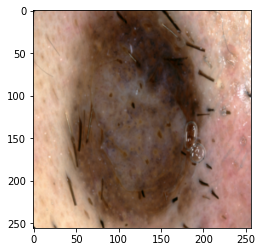

In [16]:
# Check images loaded correctly
plt.imshow(X_train[0], cmap='gray')
plt.show()

In [17]:
# Convert arrays to tensors
X_train = tf.convert_to_tensor(X_train)
X_val = tf.convert_to_tensor(X_val)
X_test = tf.convert_to_tensor(X_test)
Y_train = tf.convert_to_tensor(Y_train)
Y_val = tf.convert_to_tensor(Y_val)
Y_test = tf.convert_to_tensor(Y_test)

print(X_train.shape)
print(X_val.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_val.shape)
print(Y_test.shape)

(448, 256, 256, 3)
(112, 256, 256, 3)
(140, 256, 256, 3)
(448, 256, 256)
(112, 256, 256)
(140, 256, 256)


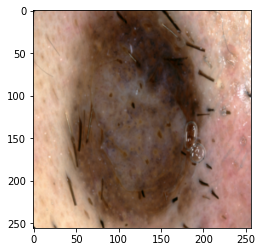

In [18]:
# Check images converted correctly
plt.imshow(X_train[0], cmap='gray')
plt.show()

In [26]:
model = UNet()

In [20]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', dice])

In [21]:
model_hist = model.fit(X_train, Y_train,
            epochs=epochs,
            batch_size=batch_size,
            shuffle=True,
            validation_data=(X_val, Y_val))

Epoch 1/15
12/12 [==============================] - 64s 5s/step - loss: 12.4141 - accuracy: 0.4827 - dice: 0.3159 - val_loss: 12.4116 - val_accuracy: 0.4596 - val_dice: 0.3160
Epoch 2/15
12/12 [==============================] - 62s 5s/step - loss: 12.4141 - accuracy: 0.4827 - dice: 0.3124 - val_loss: 12.4116 - val_accuracy: 0.4596 - val_dice: 0.3160
Epoch 3/15
12/12 [==============================] - 61s 5s/step - loss: 12.4141 - accuracy: 0.4827 - dice: 0.3117 - val_loss: 12.4116 - val_accuracy: 0.4596 - val_dice: 0.3160
Epoch 4/15
12/12 [==============================] - 61s 5s/step - loss: 12.4141 - accuracy: 0.4827 - dice: 0.3004 - val_loss: 12.4116 - val_accuracy: 0.4596 - val_dice: 0.3160
Epoch 5/15
12/12 [==============================] - 62s 5s/step - loss: 12.4141 - accuracy: 0.4827 - dice: 0.3243 - val_loss: 12.4116 - val_accuracy: 0.4596 - val_dice: 0.3160
Epoch 6/15
12/12 [==============================] - 61s 5s/step - loss: 12.4141 - accuracy: 0.4827 - dice: 0.3085 - val_

In [28]:
out = model.predict(X_test)

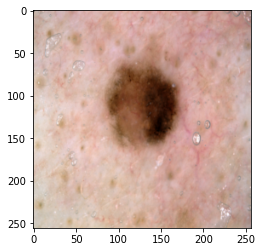

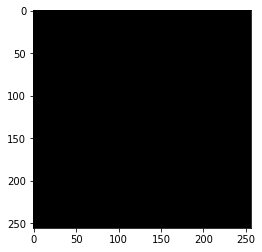

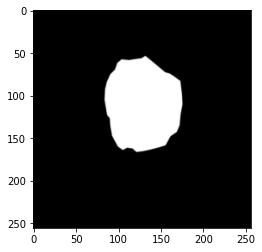

In [23]:
# display original
plt.imshow(X_train[1])
plt.gray()
plt.show()

# display reconstruction
plt.imshow(out[1])
plt.gray()
plt.show()

# display ground truth
plt.imshow(Y_train[1])
plt.gray()
plt.show()

Note: as can be seen in the images above, it is clear that the UNet is not working as expected, and is not resulting in segmented images. This explains the poor results. However, due to the length of time I have spent in this assignment attempting to get errors resolved, as well as medical issues that led to me requiring an extension, I unfortunately have not had time to resolve this.

dict_keys(['loss', 'accuracy', 'dice', 'val_loss', 'val_accuracy', 'val_dice'])


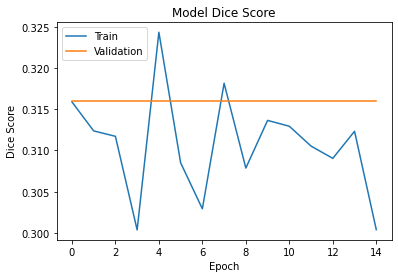

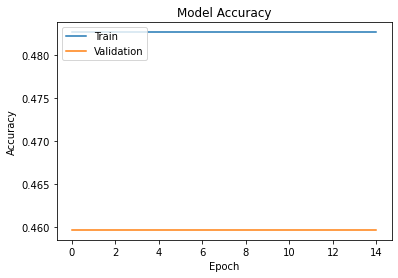

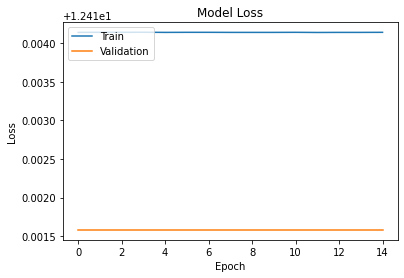

In [24]:
print(model_hist.history.keys())
#Dice
plt.plot(model_hist.history['dice'])
plt.plot(model_hist.history['val_dice'])
plt.title('Model Dice Score')
plt.ylabel('Dice Score')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
#Accuracy
plt.plot(model_hist.history['accuracy'])
plt.plot(model_hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
#Loss
plt.plot(model_hist.history['loss'])
plt.plot(model_hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()